In [ ]:
%pip install tensorflow

In [ ]:
%pip install livelossplot

In [7]:
import tensorflow as tf 
print(tf.__version__)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from livelossplot import PlotLossesKerasTF
import tensorflow as tf


2.18.0


In [ ]:
%pip install seaborn

In [8]:
%cd Emotion-Recognition/
print("\nTraining dataset\n")
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")
print("\nTest dataset\n")
for expression in os.listdir("test/"):
    print(str(len(os.listdir("test/" + expression))) + " " + expression + " images")

[WinError 2] The system cannot find the file specified: 'Emotion-Recognition/'
c:\Subham\IITR\Face_recognize\Face_recognize\Emotion-Recognition

Training dataset

3995 angry images
436 disgust images
4097 fear images
7214 happy images
4965 neutral images
4830 sad images
3171 surprise images

Test dataset

7 test images


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [9]:
img_size = 48
batch_size = 64
from tensorflow.keras.utils import to_categorical

datagen_train = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.1)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 3,002,887 (11.46 MB)

 Trainable params: 2,999,431 (11.44 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [12]:
%pip install scipy

  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


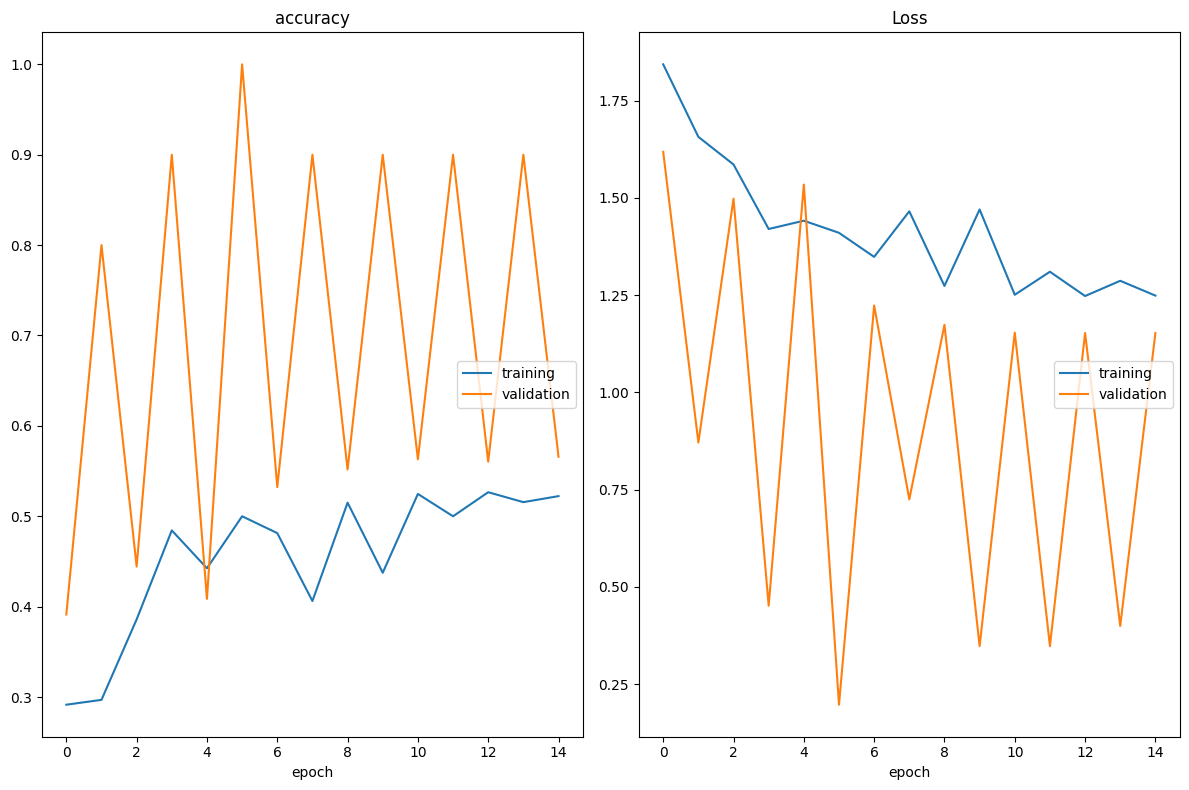

accuracy
	training         	 (min:    0.292, max:    0.527, cur:    0.522)
	validation       	 (min:    0.391, max:    1.000, cur:    0.566)
Loss
	training         	 (min:    1.248, max:    1.843, cur:    1.249)
	validation       	 (min:    0.197, max:    1.618, cur:    1.152)

Epoch 15: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 77s 172ms/step - accuracy: 0.5249 - loss: 1.2489 - val_accuracy: 0.5658 - val_loss: 1.1523 - learning_rate: 1.0000e-05
CPU times: total: 36min 46s
Wall time: 11min 48s


In [13]:
%%time

epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

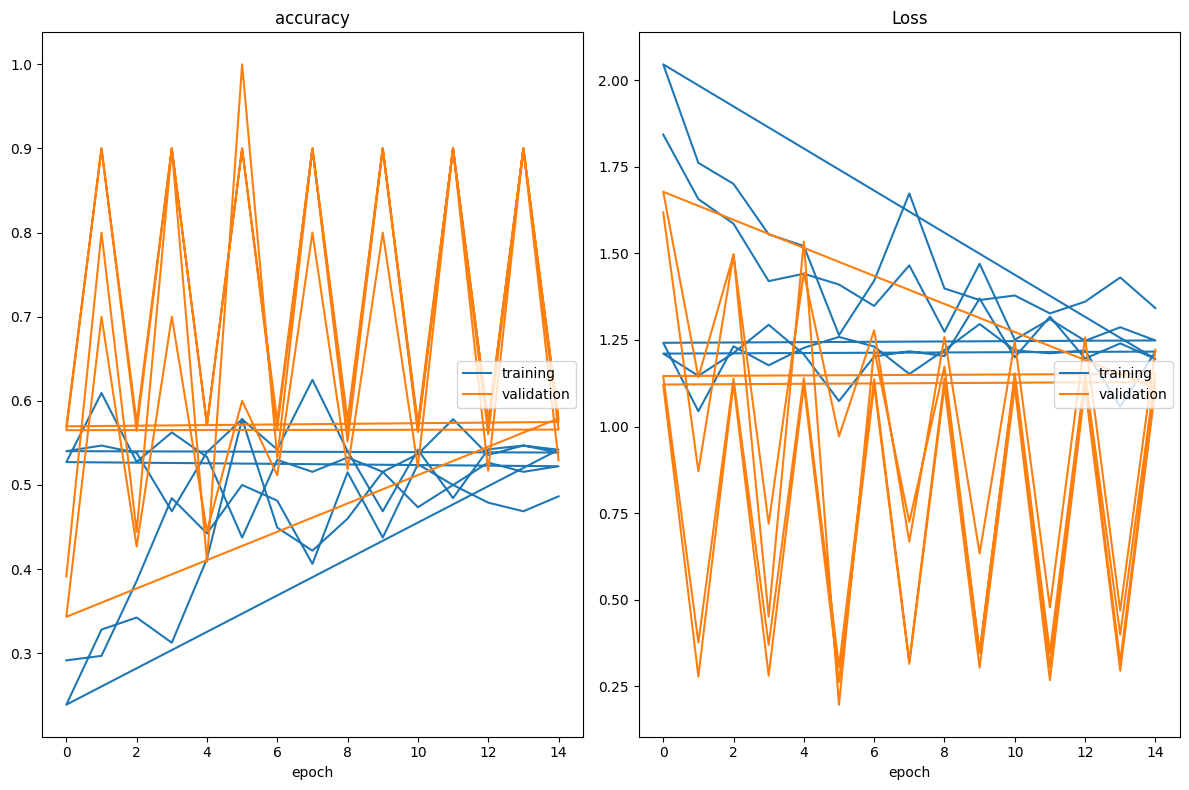

accuracy
	training         	 (min:    0.239, max:    0.625, cur:    0.486)
	validation       	 (min:    0.343, max:    1.000, cur:    0.530)
Loss
	training         	 (min:    1.045, max:    2.046, cur:    1.342)
	validation       	 (min:    0.197, max:    1.678, cur:    1.222)

Epoch 15: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 77s 171ms/step - accuracy: 0.4933 - loss: 1.3341 - val_accuracy: 0.5296 - val_loss: 1.2223 - learning_rate: 5.0000e-05


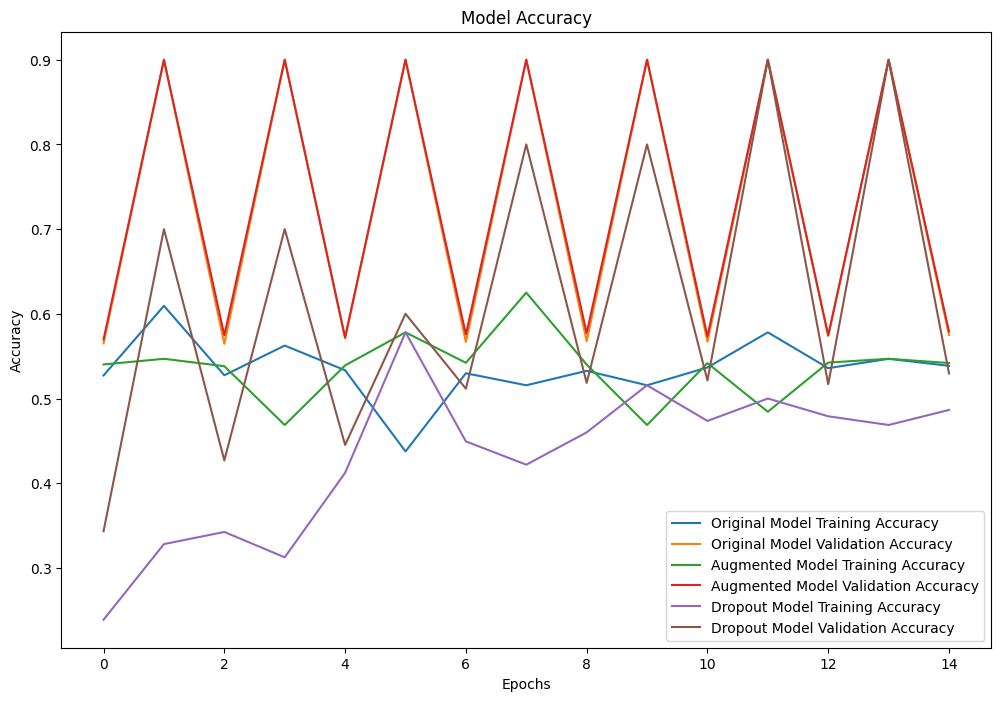

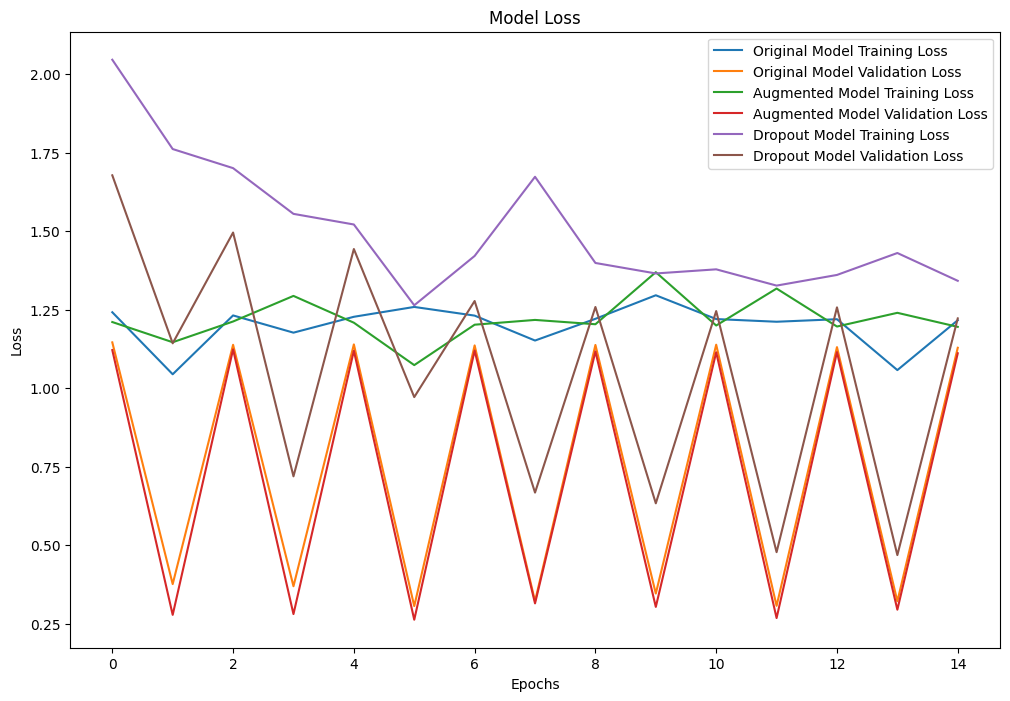

In [14]:
# Data Augmentation using Keras pre-processing layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Create a new neural network with dropout regularization
def create_model_with_dropout():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(7, activation='softmax'))

    opt = Adam(learning_rate=0.0005)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and visualize the original model
history_original = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Train and visualize the model after data augmentation
augmented_train_generator = datagen_train.flow_from_directory("train/",
                                                              target_size=(img_size, img_size),
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=True)

history_augmented = model.fit(
    x=augmented_train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Train and visualize the model after introducing dropout
model_with_dropout = create_model_with_dropout()

history_dropout = model_with_dropout.fit(
    x=augmented_train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Visualize the training and validation accuracy and loss for all three models
plt.figure(figsize=(12, 8))

# Original model
plt.plot(history_original.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Model Validation Accuracy')

# Model with data augmentation
plt.plot(history_augmented.history['accuracy'], label='Augmented Model Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Model Validation Accuracy')

# Model with dropout
plt.plot(history_dropout.history['accuracy'], label='Dropout Model Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))

# Original model
plt.plot(history_original.history['loss'], label='Original Model Training Loss')
plt.plot(history_original.history['val_loss'], label='Original Model Validation Loss')

# Model with data augmentation
plt.plot(history_augmented.history['loss'], label='Augmented Model Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Augmented Model Validation Loss')

# Model with dropout
plt.plot(history_dropout.history['loss'], label='Dropout Model Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Dropout Model Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Extract the final validation accuracy for each model
original_model_val_accuracy = history_original.history['val_accuracy'][-1]
augmented_model_val_accuracy = history_augmented.history['val_accuracy'][-1]
dropout_model_val_accuracy = history_dropout.history['val_accuracy'][-1]

# Calculate the differences
diff_original_augmented = augmented_model_val_accuracy - original_model_val_accuracy
diff_original_dropout = dropout_model_val_accuracy - original_model_val_accuracy
diff_augmented_dropout = dropout_model_val_accuracy - augmented_model_val_accuracy

# Print the accuracies and differences
print(f"Original Model Validation Accuracy: {original_model_val_accuracy:.4f}")
print(f"Augmented Model Validation Accuracy: {augmented_model_val_accuracy:.4f}")
print(f"Dropout Model Validation Accuracy: {dropout_model_val_accuracy:.4f}")

print(f"\nDifference between Augmented and Original Model: {diff_original_augmented:.4f}")
print(f"Difference between Dropout and Original Model: {diff_original_dropout:.4f}")
print(f"Difference between Dropout and Augmented Model: {diff_augmented_dropout:.4f}")

Original Model Validation Accuracy: 0.5749
Augmented Model Validation Accuracy: 0.5791
Dropout Model Validation Accuracy: 0.5296

Difference between Augmented and Original Model: 0.0042
Difference between Dropout and Original Model: -0.0453
Difference between Dropout and Augmented Model: -0.0495



### Enhancing Accuracy with Data Augmentation and Dropout Regularization

In this notebook, we explored techniques to enhance the accuracy of our neural network model by addressing overfitting. Overfitting occurs when a model performs well on training data but poorly on validation data. To mitigate overfitting, we implemented data augmentation and dropout regularization.

#### Data Augmentation
Data augmentation is a technique to artificially increase the size of the training dataset by creating modified versions of images. This helps the model generalize better to new data. We used the following Keras pre-processing layers for data augmentation:
- `tf.keras.layers.RandomFlip`: Randomly flips the images horizontally and vertically.
- `tf.keras.layers.RandomRotation`: Randomly rotates the images by a specified factor.
- `tf.keras.layers.RandomZoom`: Randomly zooms into the images by a specified factor.

#### Dropout Regularization
Dropout is a regularization technique where randomly selected neurons are ignored during training. This prevents the model from becoming too reliant on specific neurons, thereby reducing overfitting. We introduced `tf.keras.layers.Dropout` layers in our neural network.

#### Results
We trained three models:
1. **Original Model**: Without data augmentation or dropout.
2. **Augmented Model**: With data augmentation.
3. **Dropout Model**: With both data augmentation and dropout regularization.

The final validation accuracies for each model were as follows:
- **Original Model Validation Accuracy**: 0.5749
- **Augmented Model Validation Accuracy**: 0.5791
- **Dropout Model Validation Accuracy**: 0.5296

#### Differences in Validation Accuracy
- **Difference between Augmented and Original Model**: 0.0042
- **Difference between Dropout and Original Model**: -0.0453
- **Difference between Dropout and Augmented Model**: -0.0495

#### Conclusion
Data augmentation slightly improved the validation accuracy, indicating that it helped the model generalize better. However, introducing dropout regularization did not improve the validation accuracy in this case. This suggests that while data augmentation was beneficial, the dropout regularization might need further tuning or might not be as effective for this specific dataset and model architecture.
